# MODELAGEM DE DISPERSÃO

Neste notebook vamos implementar um modelo de dispersão gaussiano.

In [1]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [3]:
# Utilizando a função do modelo gaussiano
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 10 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
H = 50 # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H)

print("A concentração estimada é = " +str(conc) + ' [$\mu$]g/m³')

A concentração estimada é = 86.2052564132534 [$\mu$]g/m³


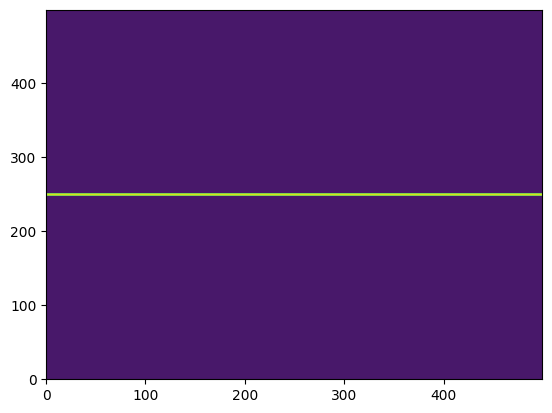

In [9]:
# Criando domínio de modelagem
x = np.linspace(-10000,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,H)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.contourf(conc)